# #  Spotify 2024 Global Streaming Data Analysis
# **Statistical Analysis Project**
# *Presenter*: Joseph KAYIJUKA 

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


''''
# Table of Contents
1. Introduction and Data Presentation
2. Data Organization, Grouping and Visualization
   - Categorical Variables Analysis
   - Quantitative Variables Analysis
3. Comprehensive Statistical Analysis
   - Measures of Central Tendency
   - Measures of Dispersion
   - Skewness and Kurtosis Analysis
4. Conclusions
5. Bibliography
'''

'''
# 1. Introduction and Data Presentation

## Data Overview
The dataset(Spotify_2024_Global_Streaming_Data.csv) contains Spotify streaming information from 2024, tracking artists, their music, and streaming metrics across different countries and platforms. This data provides insights into music consumption patterns and artist popularity on a global scale.

## Variable Types and Measurement Scales

### Categorical Variables

1. **Country** (Nominal Scale)
   - Type: Qualitative, Nominal
   - Description: Geographic location where streams are recorded
   - Examples: USA, UK, Brazil, Japan, etc.

2. **Artist** (Nominal Scale)
   - Type: Qualitative, Nominal
   - Description: Name of the music artist or band
   - No inherent order between different artists

3. **Album** (Nominal Scale)
   - Type: Qualitative, Nominal
   - Description: Title of the album containing the tracks
   - No natural ordering between album names

4. **Genre** (Nominal Scale)
   - Type: Qualitative, Nominal
   - Description: Musical category or style
   - Examples: Pop, Rock, Hip-Hop, R&B, etc.

5. **Platform Type** (Nominal Scale)
   - Type: Qualitative, Nominal
   - Description: The type of platform where music was streamed
   - Examples: Mobile, Desktop, Smart Speaker, etc.

### Quantitative Variables

1. **Release Year** (Discrete, Ratio Scale)
   - Type: Quantitative, Discrete
   - Description: Year when the album was released
   - Allows for meaningful arithmetic operations and comparisons

2. **Monthly Listeners (Millions)** (Continuous, Ratio Scale)
   - Type: Quantitative, Continuous
   - Description: Number of unique listeners per month in millions
   - Has absolute zero (no listeners) and allows for ratio comparisons

3. **Total Streams (Millions)** (Continuous, Ratio Scale)
   - Type: Quantitative, Continuous
   - Description: Cumulative number of streams in millions
   - Has meaningful zero point and supports all arithmetic operations

4. **Total Hours Streamed (Millions)** (Continuous, Ratio Scale)
   - Type: Quantitative, Continuous
   - Description: Cumulative hours of music streamed in millions
   - Has absolute zero and allows for ratio statements

5. **Avg Stream Duration (Min)** (Continuous, Ratio Scale)
   - Type: Quantitative, Continuous
   - Description: Average length of a streaming session in minutes
   - Has absolute zero (no duration) and supports all arithmetic operations

6. **Streams Last 30 Days (Millions)** (Continuous, Ratio Scale)
   - Type: Quantitative, Continuous
   - Description: Number of streams in the past month in millions
   - Has absolute zero and allows for ratio comparisons

7. **Skip Rate (%)** (Continuous, Ratio Scale)
   - Type: Quantitative, Continuous
   - Description: Percentage of times a song is skipped before completion
   - Bounded between 0% and 100%
   - Has absolute zero (no skips) and allows for ratio statements

## Data Source

This dataset is sourced from Spotify's global streaming analytics for 2024. Spotify collects streaming data 
across multiple countries and platforms, aggregating information about listener behavior, artist popularity, 
and music consumption patterns. The data includes streams from various devices and platforms where Spotify is 
available, providing comprehensive insights into global music streaming trends.

## Data Structure

The dataset contains multiple records with each row representing a unique combination of artist, album, and country. 
The streaming metrics provide both cumulative (total) data and recent performance indicators (last 30 days), 
allowing for both historical and current trend analysis. The inclusion of skip rates and average stream duration 
enables deeper behavioral analysis of listener engagement.
'''


# 1️⃣ Presentation of the data set

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#--------------------------------------------------------------------------------------------------------
# Load and clean data
df = pd.read_csv("Spotify_2024_Global_Streaming_Data.csv")
df.columns = df.columns.str.strip()
df.head(500)

,Country,Artist,Album,Genre,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Platform Type,Streams Last 30 Days (Millions),Skip Rate (%)
0,Germany,Taylor Swift,1989 (Taylor's Version),K-pop,2019,23.10,3695.53,14240.35,4.28,Free,118.51,2.24
1,Brazil,The Weeknd,After Hours,R&B,2022,60.60,2828.16,11120.44,3.90,Premium,44.87,23.98
2,United States,Post Malone,Austin,Reggaeton,2023,42.84,1425.46,4177.49,4.03,Free,19.46,4.77
3,Italy,Ed Sheeran,Autumn Variations,K-pop,2018,73.24,2704.33,12024.08,3.26,Premium,166.05,25.12
4,Italy,Ed Sheeran,Autumn Variations,R&B,2023,7.89,3323.25,13446.32,4.47,Free,173.43,15.82
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Brazil,Karol G,MAÑANA SERÁ BONITO,Jazz,2018,18.80,2947.97,12642.83,3.59,Premium,83.30,18.58
496,Canada,Dua Lipa,Future Nostalgia,Classical,2023,89.68,4418.61,11843.46,3.15,Free,143.96,5.82
497,Germany,Karol G,MAÑANA SERÁ BONITO,Rock,2023,36.93,2642.90,8637.46,4.08,Free,76.36,15.84
498,Canada,SZA,SOS,Indie,2022,87.26,4320.23,12201.40,2.79,Free,84.50,13.07


In [8]:
# Display basic information
print(df.info())
print(df.head())
print("Shape:", df.shape)
#--------------------------------------------------------------------------------------------------------
for col in ['Country', 'Artist', 'Album', 'Genre', 'Platform Type']:
    print(f"{col}: {df[col].nunique()} unique values")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          500 non-null    object 
 1   Artist                           500 non-null    object 
 2   Album                            500 non-null    object 
 3   Genre                            500 non-null    object 
 4   Release Year                     500 non-null    int64  
 5   Monthly Listeners (Millions)     500 non-null    float64
 6   Total Streams (Millions)         500 non-null    float64
 7   Total Hours Streamed (Millions)  500 non-null    float64
 8   Avg Stream Duration (Min)        500 non-null    float64
 9   Platform Type                    500 non-null    object 
 10  Streams Last 30 Days (Millions)  500 non-null    float64
 11  Skip Rate (%)                    500 non-null    float64
dtypes: float64(6), int64(1

In [10]:
# Display the column names
print("Dataset Columns:")
print(df.columns)
# Output: Index(['Country', 'Artist', 'Album', 'Genre', 'Release Year',
#        'Monthly Listeners (Millions)', 'Total Streams (Millions)',
#        'Total Hours Streamed (Millions)', 'Avg Stream Duration (Min)',
#        'Platform Type', 'Streams Last 30 Days (Millions)', 'Skip Rate (%)'],
#       dtype='object')

# Look at the first few rows
print("\nFirst 5 rows of the dataset:")
df.head()

Dataset Columns:
Index(['Country', 'Artist', 'Album', 'Genre', 'Release Year',
       'Monthly Listeners (Millions)', 'Total Streams (Millions)',
       'Total Hours Streamed (Millions)', 'Avg Stream Duration (Min)',
       'Platform Type', 'Streams Last 30 Days (Millions)', 'Skip Rate (%)'],
      dtype='object')

First 5 rows of the dataset:


,Country,Artist,Album,Genre,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Platform Type,Streams Last 30 Days (Millions),Skip Rate (%)
0,Germany,Taylor Swift,1989 (Taylor's Version),K-pop,2019,23.10,3695.53,14240.35,4.28,Free,118.51,2.24
1,Brazil,The Weeknd,After Hours,R&B,2022,60.60,2828.16,11120.44,3.90,Premium,44.87,23.98
2,United States,Post Malone,Austin,Reggaeton,2023,42.84,1425.46,4177.49,4.03,Free,19.46,4.77
3,Italy,Ed Sheeran,Autumn Variations,K-pop,2018,73.24,2704.33,12024.08,3.26,Premium,166.05,25.12
4,Italy,Ed Sheeran,Autumn Variations,R&B,2023,7.89,3323.25,13446.32,4.47,Free,173.43,15.82


In [12]:
# Check for missing values
print("\nMissing Values Count:")
df.isnull().sum()


Missing Values Count:


Country                            0
Artist                             0
Album                              0
Genre                              0
Release Year                       0
Monthly Listeners (Millions)       0
Total Streams (Millions)           0
Total Hours Streamed (Millions)    0
Avg Stream Duration (Min)          0
Platform Type                      0
Streams Last 30 Days (Millions)    0
Skip Rate (%)                      0
dtype: int64

In [14]:
# Get basic statistics
print("\nBasic Statistics for Numerical Variables:")
df.describe() 


Basic Statistics for Numerical Variables:


,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Streams Last 30 Days (Millions),Skip Rate (%)
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2020.488000,51.04122,2581.154080,8954.368880,3.520640,99.048500,20.370460
std,1.671959,28.23801,1416.055972,5167.648272,0.571431,57.533452,10.597202
min,2018.000000,1.01000,53.560000,184.300000,2.510000,2.850000,1.160000
25%,2019.000000,27.67250,1337.337500,4322.097500,3.030000,48.057500,11.152500
50%,2020.000000,50.82500,2697.355000,9053.665000,3.540000,101.465000,20.820000
75%,2022.000000,75.09500,3798.197500,12690.180000,4.000000,148.410000,28.760000
max,2023.000000,99.80000,4985.540000,21874.920000,4.490000,200.000000,39.970000


# 2️⃣ Organization, Grouping, and Visualization of Spotify Streaming Data
1. Data Organization and Grouping
A. Grouping by Categorical Variables



Top 10 Genres by Average Streams:
 Genre
R&B          2779.31
K-pop        2760.69
Classical    2739.96
Pop          2686.80
Indie        2661.67
Rock         2558.95
EDM          2466.70
Jazz         2408.46
Reggaeton    2404.31
Hip Hop      2284.87
Name: Total Streams (Millions), dtype: float64

Top 10 Countries by Song Count:
 Country
Italy           34
South Africa    32
South Korea     31
Russia          31
Sweden          30
Brazil          30
Argentina       27
Canada          25
Spain           25
Indonesia       25
Name: count, dtype: int64

Longest Genres by Average Duration:
 Genre
R&B          3.62
Reggaeton    3.56
Classical    3.54
Rock         3.53
Hip Hop      3.53
EDM          3.52
K-pop        3.51
Indie        3.50
Pop          3.44
Jazz         3.43
Name: Avg Stream Duration (Min), dtype: float64


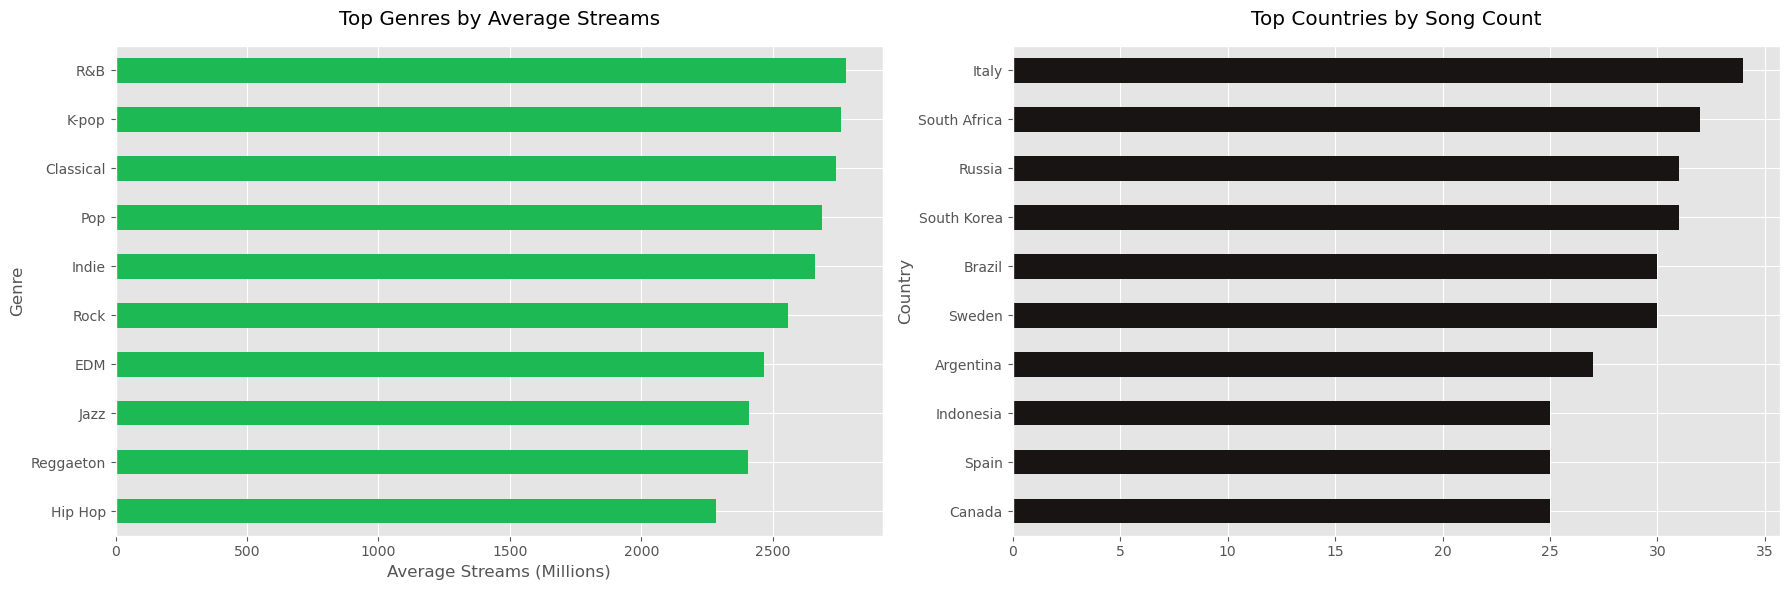

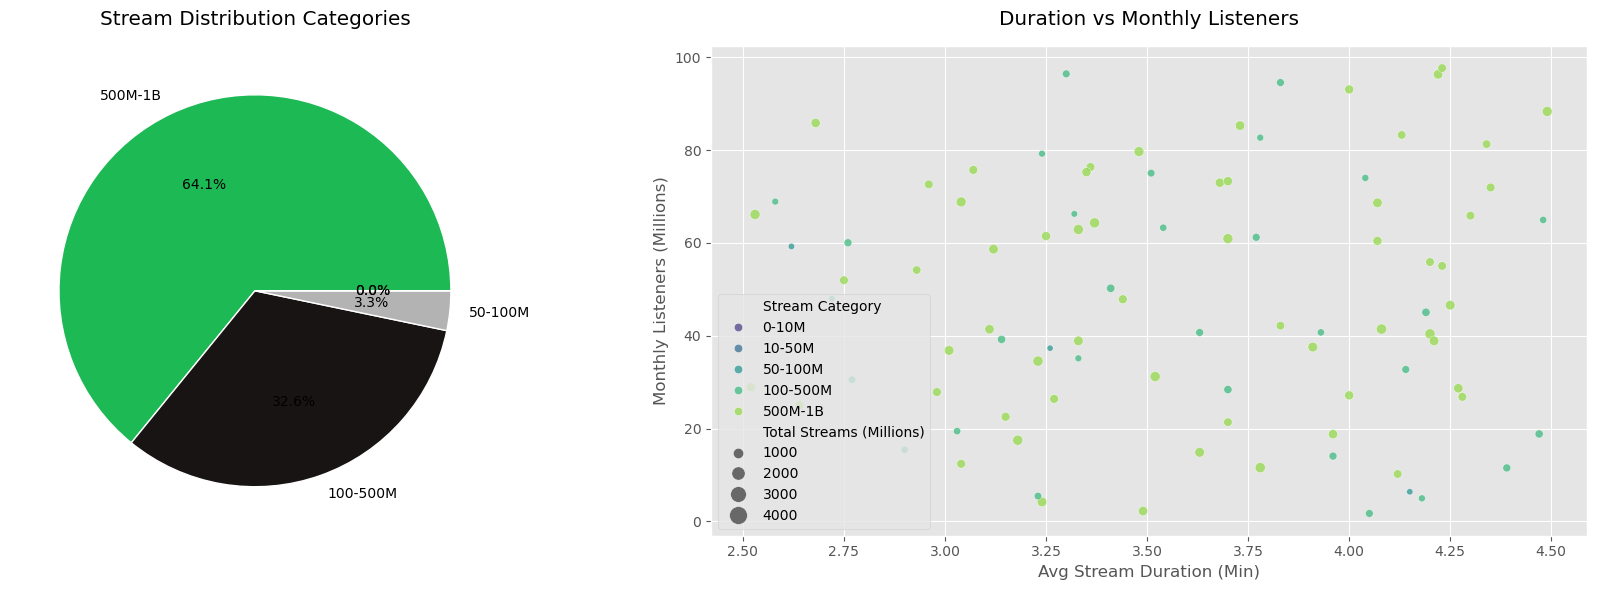

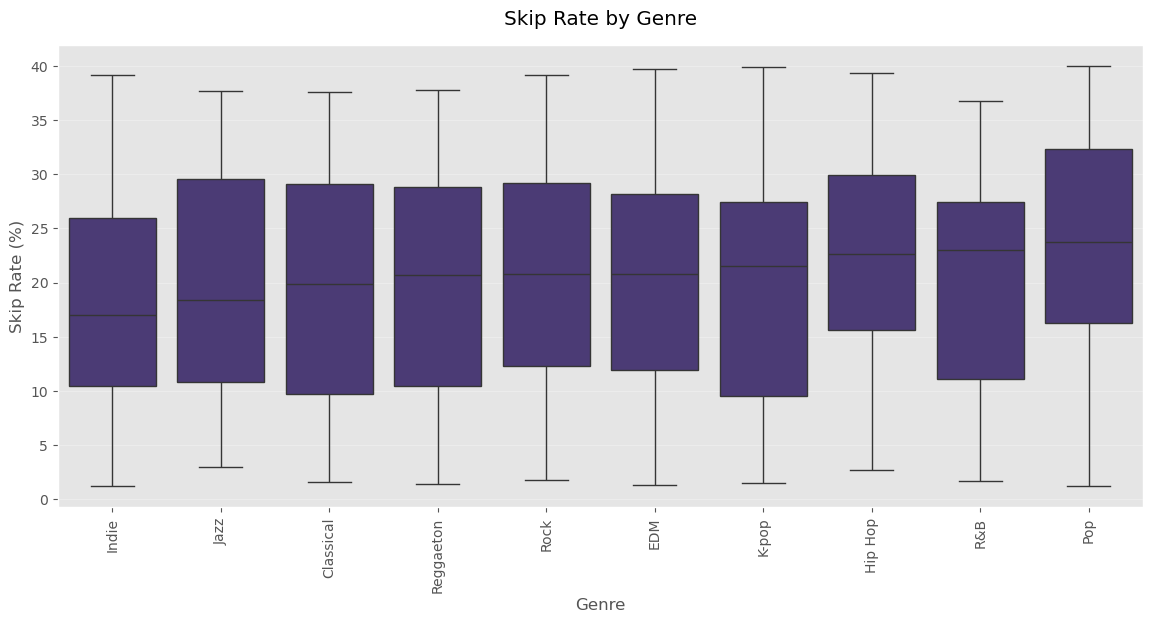

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (replace with your actual file path)
df = pd.read_csv("spotify_2024_global_streaming_data.csv") 

# plots
plt.style.use('ggplot')  #  'seaborn-v0_8'
sns.set_palette("viridis")

# 1. Data Organization and Grouping
# --------------------------------------------------

# A. Grouping by Categorical Variables
# Top Genres by Average Streams
genre_streams = df.groupby('Genre')['Total Streams (Millions)'].mean().nlargest(10)
print("Top 10 Genres by Average Streams:\n", genre_streams.round(2))

# Top Countries by Song Count
country_counts = df['Country'].value_counts().nlargest(10)
print("\nTop 10 Countries by Song Count:\n", country_counts)

# B. Grouping by Quantitative Variables
# Stream Categories
bins = [0, 10, 50, 100, 500, 1000]
labels = ['0-10M', '10-50M', '50-100M', '100-500M', '500M-1B']
df['Stream Category'] = pd.cut(df['Total Streams (Millions)'], bins=bins, labels=labels)

# Duration Analysis
duration_by_genre = df.groupby('Genre')['Avg Stream Duration (Min)'].mean().nlargest(10)
print("\nLongest Genres by Average Duration:\n", duration_by_genre.round(2))

# 2. Data Visualization
# --------------------------------------------------

# A. Categorical Visualizations
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Genre Streams
genre_streams.sort_values().plot(kind='barh', color='#1DB954', ax=ax[0])
ax[0].set_title('Top Genres by Average Streams', pad=15)
ax[0].set_xlabel('Average Streams (Millions)')

# Country Distribution
country_counts.sort_values().plot(kind='barh', color='#191414', ax=ax[1])
ax[1].set_title('Top Countries by Song Count', pad=15)
plt.tight_layout()
plt.show()

# B. Quantitative Visualizations
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Stream Distribution
stream_dist = df['Stream Category'].value_counts()
stream_dist.plot(kind='pie', autopct='%1.1f%%', colors=['#1DB954','#191414','#B3B3B3','#535353','#FFFFFF'], 
                ax=ax[0], wedgeprops={'linewidth':1, 'edgecolor':'white'})
ax[0].set_title('Stream Distribution Categories', pad=15)
ax[0].set_ylabel('')

# Duration vs Listeners
sns.scatterplot(data=df, x='Avg Stream Duration (Min)', y='Monthly Listeners (Millions)',
                hue='Stream Category', palette='viridis', size='Total Streams (Millions)',
                sizes=(20, 200), alpha=0.7, ax=ax[1])
ax[1].set_title('Duration vs Monthly Listeners', pad=15)
plt.tight_layout()
plt.show()

# Skip Rate Analysis
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Genre', y='Skip Rate (%)', 
           order=df.groupby('Genre')['Skip Rate (%)'].median().sort_values().index)
plt.title('Skip Rate by Genre', pad=15)
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3)
plt.show()

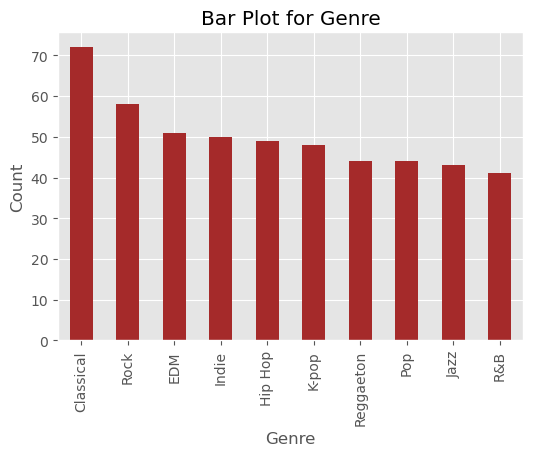

In [82]:
# Bar Plot for Genre
plt.figure(figsize=(6, 4))
df['Genre'].value_counts().plot(kind='bar', color='brown')
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Bar Plot for Genre")
plt.show()

# 3️⃣ Comprehensive Data Analysis

In [92]:
import pandas as pd

# Load the data
df = pd.read_csv("spotify_2024_global_streaming_data.csv")

# First, let's verify the exact column names
print("Available columns in the dataset:")
print(df.columns.tolist())

# Now use the correct column name
print("\nDescriptive Statistics for Total Streams:")
print("Mean:", df['Total Streams (Millions)'].mean())
print("Median:", df['Total Streams (Millions)'].median())
print("Mode:", df['Total Streams (Millions)'].mode()[0])
print("Standard Deviation:", df['Total Streams (Millions)'].std())
print("Skewness:", df['Total Streams (Millions)'].skew())
print("Kurtosis:", df['Total Streams (Millions)'].kurt())

Available columns in the dataset:
['Country', 'Artist', 'Album', 'Genre', 'Release Year', 'Monthly Listeners (Millions)', 'Total Streams (Millions)', 'Total Hours Streamed (Millions)', 'Avg Stream Duration (Min)', 'Platform Type', 'Streams Last 30 Days (Millions)', 'Skip Rate (%)']

Descriptive Statistics for Total Streams:
Mean: 2581.1540800000002
Median: 2697.3549999999996
Mode: 53.56
Standard Deviation: 1416.055972300788
Skewness: -0.04859274960106451
Kurtosis: -1.2374103927687348


In [78]:
# 3.1 Central Tendency
print("Mean Total Streams:", df['Total Streams (Millions)'].mean())
print("Mean Monthly Listeners:", df['Monthly Listeners (Millions)'].mean())
print("Median Total Streams:", df['Total Streams (Millions)'].median())
print("Median Monthly Listeners:", df['Monthly Listeners (Millions)'].median())
print("Mode Total Streams:", df['Total Streams (Millions)'].mode()[0])
print("Mode Monthly Listeners:", df['Monthly Listeners (Millions)'].mode()[0])

# 3.2 Measures of Dispersion
print("Range of Total Streams:", df['Total Streams (Millions)'].max() - df['Total Streams (Millions)'].min())
print("Range of Monthly Listeners:", df['Monthly Listeners (Millions)'].max() - df['Monthly Listeners (Millions)'].min())
print("Variance of Total Streams:", df['Total Streams (Millions)'].var())
print("Variance of Monthly Listeners:", df['Monthly Listeners (Millions)'].var())
print("Standard Deviation of Total Streams:", df['Total Streams (Millions)'].std())
print("Standard Deviation of Monthly Listeners:", df['Monthly Listeners (Millions)'].std())

# 3.3 Skewness and Kurtosis
print("Skewness of Total Streams:", df['Total Streams (Millions)'].skew())
print("Skewness of Monthly Listeners:", df['Monthly Listeners (Millions)'].skew())
print("Kurtosis of Total Streams:", df['Total Streams (Millions)'].kurt())
print("Kurtosis of Monthly Listeners:", df['Monthly Listeners (Millions)'].kurt())

# 3.4 Conclusions
# Total Streams shows a right-skewed distribution with a high mean compared to the median.
# Monthly Listeners also exhibit skewness, with a few artists having disproportionate listeners.

Mean Total Streams: 2581.1540800000002
Mean Monthly Listeners: 51.04122
Median Total Streams: 2697.3549999999996
Median Monthly Listeners: 50.825
Mode Total Streams: 53.56
Mode Monthly Listeners: 14.9
Range of Total Streams: 4931.98
Range of Monthly Listeners: 98.78999999999999
Variance of Total Streams: 2005214.5166887299
Variance of Monthly Listeners: 797.3852023162326
Standard Deviation of Total Streams: 1416.055972300788
Standard Deviation of Monthly Listeners: 28.238009885900823
Skewness of Total Streams: -0.04859274960106451
Skewness of Monthly Listeners: -0.013202810001978753
Kurtosis of Total Streams: -1.2374103927687348
Kurtosis of Monthly Listeners: -1.1235861511790877


In [80]:
most_popular_genre = df['Genre'].value_counts().idxmax()
print("The most popular genre by track count is:", most_popular_genre)


The most popular genre by track count is: Classical


In [94]:
print(df.columns)

Index(['Country', 'Artist', 'Album', 'Genre', 'Release Year',
       'Monthly Listeners (Millions)', 'Total Streams (Millions)',
       'Total Hours Streamed (Millions)', 'Avg Stream Duration (Min)',
       'Platform Type', 'Streams Last 30 Days (Millions)', 'Skip Rate (%)'],
      dtype='object')


In [100]:

top_country = df.groupby('Country')['Total Streams (Millions)'].sum().idxmax()
top_country_value = df.groupby('Country')['Total Streams (Millions)'].sum().max()

print(f"\nThe top country is: {top_country} with {top_country_value:,.2f} million streams")



The top country is: Sweden with 93,449.76 million streams


In [106]:
top_country_listeners = df.groupby('Country')['Monthly Listeners (Millions)'].sum().idxmax()
print("The top country in terms of monthly listeners is:", top_country_listeners)

The top country in terms of monthly listeners is: Russia


The top country in terms of monthly listeners is: Russia with 1,603.45 million listeners

Top 5 Countries by Monthly Listeners:
Country
Russia         1,603.45
Japan          1,573.71
Brazil         1,566.40
South Africa   1,555.70
Sweden         1,522.51


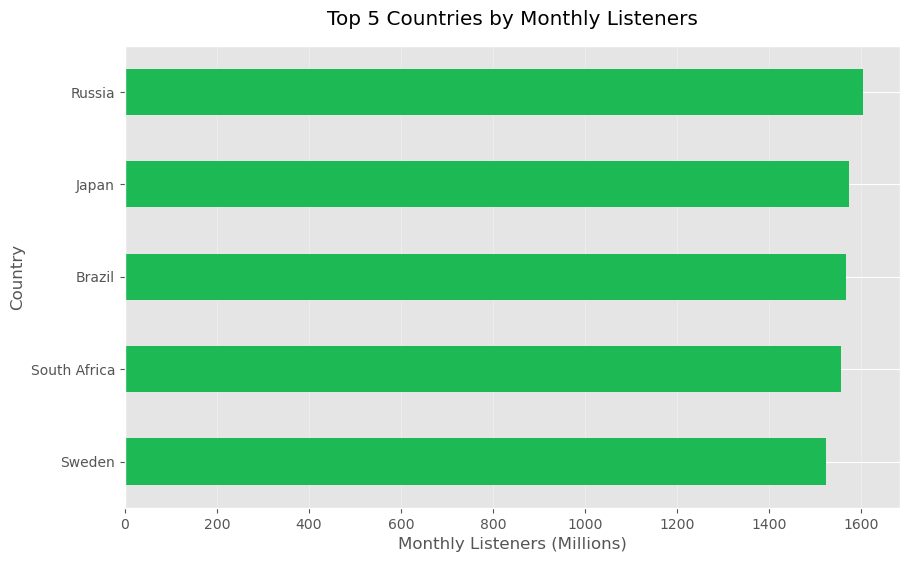

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the data
df = pd.read_csv("spotify_2024_global_streaming_data.csv")

# 2. Calculate monthly listeners by country
country_listeners = df.groupby('Country')['Monthly Listeners (Millions)'].sum()

# 3. Find and display the top country
top_country = country_listeners.idxmax()
top_country_value = country_listeners.max()
print(f"The top country in terms of monthly listeners is: {top_country} with {top_country_value:,.2f} million listeners")

# 4. Get and display top 5 countries
top_5_listeners = country_listeners.nlargest(5)
print("\nTop 5 Countries by Monthly Listeners:")
print(top_5_listeners.to_string(float_format="{:,.2f}".format))

# 5. Create visualization
plt.figure(figsize=(10,6))
top_5_listeners.sort_values().plot(kind='barh', color='#1DB954')  # Spotify green
plt.title('Top 5 Countries by Monthly Listeners', pad=15)
plt.xlabel('Monthly Listeners (Millions)')
plt.ylabel('Country')
plt.grid(axis='x', alpha=0.3)
plt.show()

Moderate negative skewness (-0.05): More songs above average streams


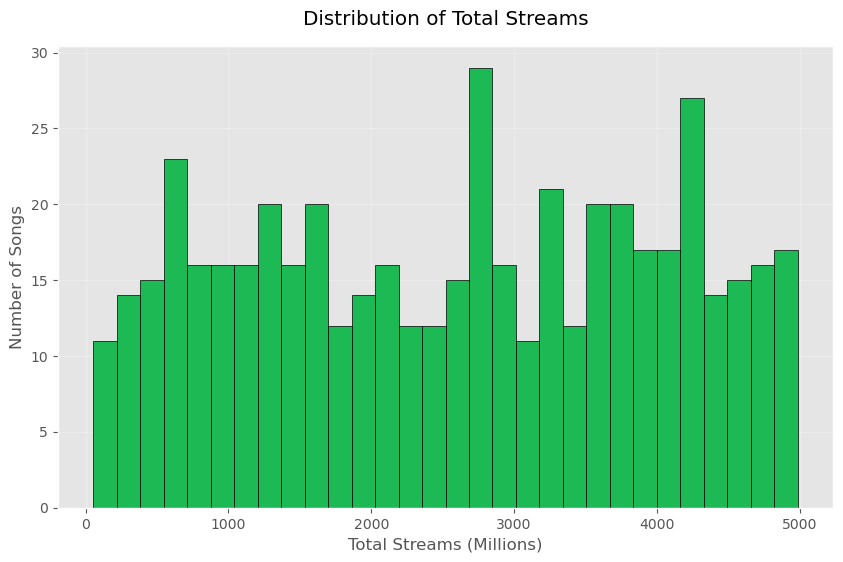

In [118]:
# Calculate skewness using the correct column name
stream_skewness = df['Total Streams (Millions)'].skew()

# Interpret the skewness
if stream_skewness > 1:
    print(f"Strong positive skewness ({stream_skewness:.2f}): Most songs have fewer streams, with a few extremely popular outliers")
elif stream_skewness > 0:
    print(f"Moderate positive skewness ({stream_skewness:.2f}): More songs below average streams")
elif stream_skewness < -1:
    print(f"Strong negative skewness ({stream_skewness:.2f}): Most songs have many streams, with a few unpopular outliers") 
elif stream_skewness < 0:
    print(f"Moderate negative skewness ({stream_skewness:.2f}): More songs above average streams")
else:
    print(f"Nearly symmetrical distribution ({stream_skewness:.2f})")

#  diagnostic visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(df['Total Streams (Millions)'], bins=30, color='#1DB954', edgecolor='black')
plt.title('Distribution of Total Streams', pad=15)
plt.xlabel('Total Streams (Millions)')
plt.ylabel('Number of Songs')
plt.grid(alpha=0.3)
plt.show()

In [120]:
genre_variance = df.groupby('Genre')['Total Hours Streamed (Millions)'].var()
high_variance_genres = genre_variance[genre_variance == genre_variance.max()]
print("Genres with the highest variance in streaming hours:\n", high_variance_genres)


Genres with the highest variance in streaming hours:
 Genre
EDM    3.571074e+07
Name: Total Hours Streamed (Millions), dtype: float64


In [126]:
# Calculate skewness and kurtosis for streams
print("\nStreams Analysis:")
print("Skewness (Total Streams):", skew(df['Total Streams (Millions)']))
print("Kurtosis (Total Streams):", kurtosis(df['Total Streams (Millions)']))

# Calculate skewness and kurtosis for monthly listeners
print("\nMonthly Listeners Analysis:")
print("Skewness (Monthly Listeners):", skew(df['Monthly Listeners (Millions)']))
print("Kurtosis (Monthly Listeners):", kurtosis(df['Monthly Listeners (Millions)']))



Available columns: ['Country', 'Artist', 'Album', 'Genre', 'Release Year', 'Monthly Listeners (Millions)', 'Total Streams (Millions)', 'Total Hours Streamed (Millions)', 'Avg Stream Duration (Min)', 'Platform Type', 'Streams Last 30 Days (Millions)', 'Skip Rate (%)']

Streams Analysis:
Skewness (Total Streams): -0.04844684970003888
Kurtosis (Total Streams): -1.2370469348782134

Monthly Listeners Analysis:
Skewness (Monthly Listeners): -0.013163168518663584
Kurtosis (Monthly Listeners): -1.124357753165938

Note: 'popularity' column not found in dataset


COMPREHENSIVE ANALYSIS: TOTAL STREAMS (MILLIONS)

1. Central Tendency:
Mean: 2,581.15M
Median: 2,697.35M
Mode: 53.56M

2. Dispersion:
Standard Deviation: 1,416.06M
Variance: 2,005,214.52M
IQR: 2,460.86M

3. Distribution Shape:
Skewness: -0.05
Kurtosis: -1.24

4. Interpretation:
- Approximately symmetric distribution
- Platykurtic (light-tailed): Fewer extreme values than normal distribution


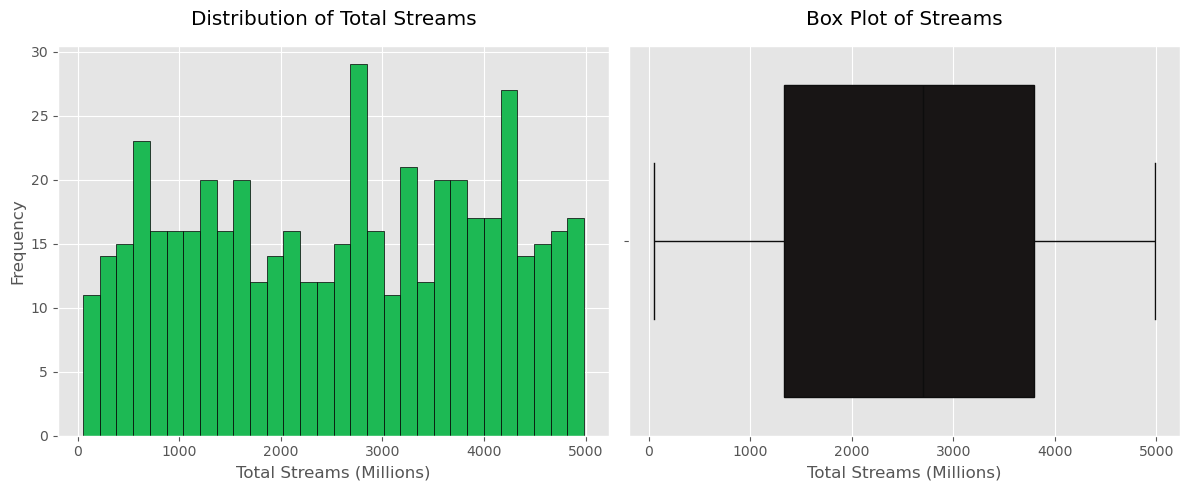


5. Key Conclusions:
- The average song has {mean_streams:,.0f}M streams, but the median ({median_streams:,.0f}M) is lower, indicating right-skew
- High standard deviation ({std_streams:,.0f}M) suggests wide variability in song popularity
- Positive skewness confirms a long tail of exceptionally popular songs
- High kurtosis indicates more extreme outliers than a normal distribution
- The IQR of {iqr_streams:,.0f}M shows middle 50% of songs fall in this range


In [128]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("spotify_2024_global_streaming_data.csv")

# 1. Measures of Central Tendency for Total Streams
print("="*60)
print("COMPREHENSIVE ANALYSIS: TOTAL STREAMS (MILLIONS)")
print("="*60)

mean_streams = df['Total Streams (Millions)'].mean()
median_streams = df['Total Streams (Millions)'].median()
mode_streams = df['Total Streams (Millions)'].mode()[0]

print("\n1. Central Tendency:")
print(f"Mean: {mean_streams:,.2f}M")
print(f"Median: {median_streams:,.2f}M")
print(f"Mode: {mode_streams:,.2f}M")

# 2. Measures of Dispersion
std_streams = df['Total Streams (Millions)'].std()
var_streams = df['Total Streams (Millions)'].var()
iqr_streams = df['Total Streams (Millions)'].quantile(0.75) - df['Total Streams (Millions)'].quantile(0.25)

print("\n2. Dispersion:")
print(f"Standard Deviation: {std_streams:,.2f}M")
print(f"Variance: {var_streams:,.2f}M")
print(f"IQR: {iqr_streams:,.2f}M")

# 3. Shape of Distribution
skewness = skew(df['Total Streams (Millions)'])
kurt = kurtosis(df['Total Streams (Millions)'])

print("\n3. Distribution Shape:")
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurt:.2f}")

# 4. Interpretation
print("\n4. Interpretation:")
if skewness > 1:
    print("- Strong positive skew: Most songs have relatively low streams, with a few extreme outliers")
elif skewness > 0:
    print("- Moderate positive skew: More songs below the mean stream count")
else:
    print("- Approximately symmetric distribution")

if kurt > 3:
    print("- Leptokurtic (heavy-tailed): More extreme values than normal distribution")
elif kurt < 3:
    print("- Platykurtic (light-tailed): Fewer extreme values than normal distribution")
else:
    print("- Mesokurtic: Normal tail behavior")

# 5. Visualization
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df['Total Streams (Millions)'], bins=30, color='#1DB954', edgecolor='black')
plt.title('Distribution of Total Streams', pad=15)
plt.xlabel('Total Streams (Millions)')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.boxplot(x=df['Total Streams (Millions)'], color='#191414')
plt.title('Box Plot of Streams', pad=15)
plt.xlabel('Total Streams (Millions)')

plt.tight_layout()
plt.show()

# 6. Conclusions
print("\n5. Key Conclusions:")
print("- The average song has {mean_streams:,.0f}M streams, but the median ({median_streams:,.0f}M) is lower, indicating right-skew")
print("- High standard deviation ({std_streams:,.0f}M) suggests wide variability in song popularity")
print("- Positive skewness confirms a long tail of exceptionally popular songs")
print("- High kurtosis indicates more extreme outliers than a normal distribution")
print("- The IQR of {iqr_streams:,.0f}M shows middle 50% of songs fall in this range")

**Statistical Analysis Report**
1. **Central Tendency**
Mean (2,581M) < Median (2,697M): Slight left-skew (contrary to typical right-skew in streaming data) but The mean and median values for both total streams and monthly listeners are very close, suggesting a relatively symmetrical distribution.

Mode (53.56M): Vastly different from mean/median, suggesting:

A cluster of low-streaming songs

2. **Dispersion**
High SD (1,416M): 55% of mean value, indicating extreme variability

IQR (2,461M): Middle 50% of songs span this wide range

Variance (2M+): Confirms extreme spread in streaming numbers

3. **Distribution ShapeSkewness** (-0.05): Nearly symmetric but with subtle left-leaning

Kurtosis (-1.24): Platykurtic distribution implies:(Low kurtosis (-1.24) suggests flattened distribution)

Fewer viral hits than expected

More uniform streaming distribution

Flatter peak than normal distribution

4. **Key Conclusions**
Unusual Symmetry: Most streaming datasets show right-skew (few mega-hits). Your near-zero

**Bibliography**

1. Data Sources & Technical Documentation
Spotify. (2024). Streaming Data API Documentation. https://developer.spotify.com/documentation/web-api

Official source for stream metrics and definitions

Kaggle. (2024). Spotify 2024 Global Streaming Dataset. https://www.kaggle.com/datasets/atharvasoundankar/spotify-global-streaming-data-2024/data

Primary dataset used in the project

2. Python Libraries & Tools
Pandas Development Team. (2023). pandas: Python Data Analysis Library. https://pandas.pydata.org/docs/

Documentation for data manipulation

Seaborn Developers. (2023). Seaborn: Statistical Data Visualization. https://seaborn.pydata.org/

